<img src="https://github.com/jonaslindemann/compute-course-docs/blob/c04294fa16a9989300f3535a0d9a863be7e11f27/source/images/numpy.png?raw=1" alt="NumPy Logo" width="600"/>

# Introduction to NumPy

NumPy is a powerful library for numerical computing in Python, providing support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. This notebook introduces the fundamental concepts of NumPy arrays, including their creation, manipulation, and various operations that can be performed on them.

---

## Learning Objectives
By the end of this notebook, you will be able to:
- Understand the fundamental concepts and advantages of NumPy arrays
- Create and manipulate multi-dimensional arrays efficiently
- Perform vectorized operations and understand their performance benefits
- Master broadcasting rules and their applications
- Apply advanced indexing operations (boolean and fancy indexing)
- Optimize memory usage and understand array storage layouts
- Distinguish between views and copies for memory efficiency
- Use NumPy functions for complex mathematical operations
- Save and load array data in various formats
- Solve linear algebra problems with NumPy
- Apply NumPy techniques to real-world scientific computing problems


---
# Using NumPy in Python

NumPy is imported according to the following convention:

In [1]:
import numpy as np

The reason we don't import **numpy** directly, but import it as **np**, is to avoid writing **numpy.** before every numpy function. It is also not recommended to use **from numpy import \*** as it may conflict with other Python features and pollute the namespace.

---
# Array Objects

The array object is the main data type in NumPy. For efficient numerical operations, all array objects are allocated as contiguous blocks of values in memory.

## Create array objects

New array objects can be created using the **np.array()** function. The first argument contains a list or a nested list of values. The last argument specifies the data type of the array.

In [2]:
a = np.array([1, 2, 3, 4], float)
print(a)

[1. 2. 3. 4.]


If no data type is specified, NumPy will determine the data type depending on what is specified as input to the function.

In [3]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [4]:
a = np.array([1.0, 2.0, 3.0])
print(a)

[1. 2. 3.]


Compared to lists, array objects can only contain values of the same type.

## Multidimensional arrays

Multidimensional arrays can be created by specifying nested lists in the **np.array ()** function.

In [5]:
a = np.array([[1,2],[3,4]])
print(a)

b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

[[1 2]
 [3 4]]
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


## How are arrays stored in memory?

Arrays are always stored as 1-dimensional blocks of values in memory. Array dimensions are really just a way to access different positions in the 1-dimensional block.

NumPy stores arrays in memory row-wise, which is also how C and C++ store two-dimensional arrays. Fortran stores arrays column by column. The following figure shows how this happens in memory:

![Array memory layout](https://github.com/jonaslindemann/guide_to_python/blob/master/chapters/kapitel5/notebooks/images/array1.png?raw=1)

## Array properties

There are several ways to query information about array objects. One of the more important properties is the shape of the array object, which can be obtained through the **.shape** properties.

In [6]:
a = np.array([1,2,3,4])
b = np.array([[1,2],[3,4]])
c = np.array([[[1,2,3,4],
               [5,6,7,8]],
              [[1,2,3,4],
               [5,6,7,8]]],float)

print(a.shape)
print(b.shape)
print(c.shape)

(4,)
(2, 2)
(2, 2, 4)


For two-dimensional array objects, the number of rows and columns can be assigned to variables using the following code:

In [7]:
r, c = b.shape
print(r, c)

2 2


The number of dimensions for an array object is queried by the **.ndim** property

In [8]:
print(b.ndim)

2


There are several other properties that can be queried. Some of these are shown in the following example:

In [9]:
b = np.array([[1,2],[3,4]])
print("array shape =", b.shape) # Size
print("array ndim =", b.ndim)   # Number of dimensions
print("array dtype =", b.dtype) # Data type
print("array size =", b.size)   # Number of elements in the array
print("array itemsize =", b.itemsize) # Size of an element in bytes

array shape = (2, 2)
array ndim = 2
array dtype = int64
array size = 4
array itemsize = 8


## Change the shape of an array

The **.reshape()** method can be used to change the shape of an array. As long as the number of values in an array is not changed, NumPy will not reallocate the memory for the array. To verify this, we first define a function that returns the array object's memory address:

In [10]:
def memory_of(a):
    return a.__array_interface__["data"][0]

In the following example, we change the shape of an array object and examine whether memory allocation changes through it.

In [ ]:
a = np.array([[1,2],[3,4]])

print(a)
print(memory_of(a))

a_flat = np.reshape(a, [4,1])

print(a_flat)
print(memory_of(a_flat))

[[1 2]
 [3 4]]
2830627092800
[[1]
 [2]
 [3]
 [4]]
2830627092800


Here we can see that the memory of the array objects is not changed and both **a** and **a_flat** point to the same memory location.

Changing values in **a** will also change values in **a_flat**.

In [12]:
a[0,0] = 42

print(a)
print(a_flat)

[[42  2]
 [ 3  4]]
[[42]
 [ 2]
 [ 3]
 [ 4]]


If you don't want this behavior when making array assignments, you must use the **.copy()** method to create a copy of the array object.

In [13]:
c = a.copy()
c[0,0] = 84

print(c)
print(memory_of(c))

print(a)
print(memory_of(a))

[[84  2]
 [ 3  4]]
2830627092896
[[42  2]
 [ 3  4]]
2830627092800


Now, **c** does not refer to the same memory address as **a**.

More examples:

In [14]:
b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

b_shaped = np.reshape(b, [8,])
print(b_shaped)

b_shaped = np.reshape(b, [4,2])
print(b_shaped)

# **Please note** this is not the same as:
b_trans = np.transpose(b)
print(b_trans)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[1. 2. 3. 4. 5. 6. 7. 8.]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
[[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


## Change the size of an array

The **.resize()** method is used to resize an already existing array object. Existing value will be retained to the extent possible. New values will be populated with values from the previous array object.

In [ ]:
base = np.array([[1,2],[3,4]])
print(base)

big = np.resize(base, [9,9])
print(big)

big = np.resize(base, [4,4])
print(big)

big = np.resize(base, [4,2])
print(big)

[[1 2]
 [3 4]]
[[1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


## Adding and removing dimensions

The **np.newaxis** object can be used to add a new dimension to an existing array. This is often useful when you want to change the shape of an array for broadcasting purposes.

For example, we can convert a one-dimensional array into a two-dimensional array with one row or one column:

In [ ]:
a = np.array([1, 2, 3])
a_row = a[np.newaxis, :]  # Shape (1, 3)
a_col = a[:, np.newaxis]  # Shape (3, 1)
print(a)
print(a_row)
print(a_col)


[1 2 3]
[[1 2 3]]
[[1]
 [2]
 [3]]


---
# Functions for Creating Array Objects

In many cases, it is impossible to create arrays using the **np.array()** function. To create larger arrays, NumPy includes a number of features for creating different types of arrays of different sizes.

### Arrays filled with zeros

A common type of array object is an arrays filled with zeros. These can be created with the **np.zeros()** function. The function takes the shape of the array object to be created as an argument and an argument for the data type.

In [16]:
a = np.zeros([5,5])
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [17]:
b = np.zeros([4,4], int)
print(b)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Array objects consisting of ones

Arrays containing ones are created in a similar way with the function **np.ones()**.

In [18]:
c = np.ones([5,10], float)
print(c)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


It is also possible to create arrays with a specific value using **np.ones()**:

In [19]:
c = np.ones([5,10], float) * 42.0
print(c)

[[42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]]


### Array ranges

In many applications, there is a need to create array objects with ranges of numeric values. This can be accomplished with the **np.arange()** function, which is similar to the standard Python function **range()**. An array of 10 elements with values from 0 to 9 is created with:

In [20]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


By combining **np.arange()** with **np.reshape()**, it is possible to create different array objects filled with value ranges:

In [21]:
b = np.reshape(np.arange(100), [10,10])
print(b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


It is possible to give start, end and step lengths just like the **range()** function

In [22]:
a = np.arange(-10,10, dtype=float)
print(a)

a = np.arange(-10,10,2)
print(a)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]
[-10  -8  -6  -4  -2   0   2   4   6   8]


As with **np.array()**, it is also possible to specify the data type for the range array.

In [23]:
a = np.arange(-10,10,2, dtype=float)
print(a)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]


### Identity Arrays

Another common array type is the identity matrix, which can easily be created with the **np.identity()** function. The function takes the size as input and an optional argument for the data type.

In [24]:
i = np.identity(10)
print(i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Array objects with linear variation

**np.arange()** works best if the range is integer. If you need a more precise range, it is better to use the **np.linspace()** function. The function takes the start, end value and number of values as input. The values between start and end are interpolated by the function.

In [25]:
x = np.linspace(0,1.0,10)
print(x)

x = np.linspace(0,1.0,20)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


---
# Array Expressions and Operations

All Python operators can be used with arrays. All operations are performed elementwise on the values in the array object.

## Elemental operations

In [16]:
# Example array

a = np.arange(25).reshape([5,5])
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


### Addition and subtraction

Adding and subtracting a scalar to an array object adds or subtracts the scalar to each element in the array.

In [27]:
print(a+3)
print(a-3)

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]
[[-3 -2 -1  0  1]
 [ 2  3  4  5  6]
 [ 7  8  9 10 11]
 [12 13 14 15 16]
 [17 18 19 20 21]]


### Multiplication and division

Multiplying and dividing an array object by a scalar multiplies or divides each element in the array by the scalar.

In [28]:
print(a*3)
print(a/3)

[[ 0  3  6  9 12]
 [15 18 21 24 27]
 [30 33 36 39 42]
 [45 48 51 54 57]
 [60 63 66 69 72]]
[[0.         0.33333333 0.66666667 1.         1.33333333]
 [1.66666667 2.         2.33333333 2.66666667 3.        ]
 [3.33333333 3.66666667 4.         4.33333333 4.66666667]
 [5.         5.33333333 5.66666667 6.         6.33333333]
 [6.66666667 7.         7.33333333 7.66666667 8.        ]]


### Negation

Negating an array object negates each element in the array.

In [29]:
print(-a)

[[  0  -1  -2  -3  -4]
 [ -5  -6  -7  -8  -9]
 [-10 -11 -12 -13 -14]
 [-15 -16 -17 -18 -19]
 [-20 -21 -22 -23 -24]]


## Elemental functions

NumPy includes a large number of mathematical functions that can be applied to array objects. All functions are applied elementwise to the array object. It is important to note that the functions in the standard Python **math** library do not work on array objects. Instead, NumPy includes its own versions of these functions that work on array objects.

In [30]:
print(np.sin(a))

[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]
 [ 0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836]]


## Operators

Operators in Python can also be used on array objects. The following table shows the most common operators and their meaning when used on array objects:

In [31]:
print(a+a)

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]


The array sizes do not have to be the same. The operations on the smaller array will be repeated on the larger array:

In [32]:
a = np.array([1,2,3])
b = np.ones([5,3])
print(a)
print(b)
print(a+b)

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


Multiplying two arrays of the same size multiplies each element in the first array with the corresponding element in the second array, not a matrix multiplication. For matrix multiplication, the **@** operator or the **np.dot()** function must be used (See next section).

## Matrix multiplication

Matrix multiplication is performed with the **@** operator or the **np.matmul()** function. The number of columns in the first matrix must be equal to the number of rows in the second matrix.

In [33]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[9,8,7],[6,5,4],[3,2,1]])
print(A)
print(B)
print(A @ B)
print(np.matmul(A, B))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


---

# Broadcasting Rules

Broadcasting is one of NumPy's most powerful features, allowing operations between arrays of different shapes. Understanding broadcasting is crucial for writing efficient NumPy code.

## Broadcasting Rules

NumPy follows specific rules when performing operations on arrays with different shapes:

1. **Rule 1**: If arrays have different numbers of dimensions, the smaller array is padded with ones on the left side.
2. **Rule 2**: If arrays have different sizes in any dimension, the array with size 1 in that dimension is stretched.
3. **Rule 3**: If arrays have different sizes in any dimension and neither has size 1, a ValueError is raised.

## Broadcasting Examples

### Scalar and array (simplest broadcasting)

In [34]:
a = np.array([1, 2, 3, 4])
b = 10
result = a + b
print(f"Array: {a}")
print(f"Scalar: {b}")
print(f"Result: {result}")
print(f"Shapes: {a.shape} + scalar -> {result.shape}")
print()

Array: [1 2 3 4]
Scalar: 10
Result: [11 12 13 14]
Shapes: (4,) + scalar -> (4,)



### 1D arrays with different sizes

In [35]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])  # Shape (2, 3)
b = np.array([10, 20, 30])  # Shape (3,)
result = a + b
print(f"Array a (2x3):\n{a}")
print(f"Array b (3,): {b}")
print(f"Result:\n{result}")
print(f"Broadcasting: {a.shape} + {b.shape} -> {result.shape}")
print()

Array a (2x3):
[[1 2 3]
 [4 5 6]]
Array b (3,): [10 20 30]
Result:
[[11 22 33]
 [14 25 36]]
Broadcasting: (2, 3) + (3,) -> (2, 3)



### 2D arrays with compatible shapes

In [36]:

a = np.array([[1, 2, 3]])  # Shape (1, 3)
b = np.array([[10],
              [20],
              [30]])       # Shape (3, 1)
result = a + b
print(f"Array a (1x3):\n{a}")
print(f"Array b (3x1):\n{b}")
print(f"Result (3x3):\n{result}")
print(f"Broadcasting: {a.shape} + {b.shape} -> {result.shape}")

Array a (1x3):
[[1 2 3]]
Array b (3x1):
[[10]
 [20]
 [30]]
Result (3x3):
[[11 12 13]
 [21 22 23]
 [31 32 33]]
Broadcasting: (1, 3) + (3, 1) -> (3, 3)


---
# Array Indexing

To access elements in an array, you can use indexing and slicing techniques similar to those used with Python lists. However, NumPy arrays offer more advanced indexing capabilities.

## Accessing array elements (indexing)

Reaching specific elements in an array is used by Python's normal index operator **[]**

In [37]:
a = np.arange(25)
print(a)
print(a[2])

b = np.arange(25).reshape([5,5])

print(b)
print(b[1,2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
7


## Assigning array elements

Assignment of value in an array is done in the same way:

In [38]:
a[2] = 42
b[1,2] = 42

print(a)
print(b)

[ 0  1 42  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6 42  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


It is also possible to mix array objects and lists when creating array objects:

In [39]:
b[1] = [42,42,42,42,42]

In [40]:
b[:,2] = [42,42,42,42,42]

In [41]:
print(b)

[[ 0  1 42  3  4]
 [42 42 42 42 42]
 [10 11 42 13 14]
 [15 16 42 18 19]
 [20 21 42 23 24]]


## Slicing arrays

It is also possible to refer to sub-arrays or slices. The notation is described in the following points:

* `a[start:end]` - values in `a` between *start* and *end-1*
* `a[start:]` - values in `a` between *start* to the *end*
* `a[:end]` - values in `a` up to *end-1*
* `a[:]` - All values in `a`

In [42]:
a = np.arange(25)
print(a)
print(a[1:5])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[1 2 3 4]


## Memory efficiency: views vs. copies

When creating sub-arrays or slices of an existing array, NumPy will, when possible, create a view of the original array. This means that no new memory is allocated for the sub-array, and changes to the sub-array will affect the original array.

In most cases, NumPy tries to re-use allocated memory when creating sub-arrays or slices, but it is not always possible, which is illustrated in the following example:

In [43]:
a = np.arange(25)

print(a)
print(memory_of(a))
print(a.data)

b = a[1:5]

print(b)
print(memory_of(b))
print(b.data)

b[0] = 42

print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2830577964592
[1 2 3 4]
2830577964600
[ 0 42  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[42  2  3  4]


## More examples of sub arrays and slices:

In [44]:
a = np.arange(16)

print(a)
print(a[:-1])    # All elements except the last
print(a[:-2])    # All elements except the last 2
print(a[-1])     # Last element of a
print(a[4:10:2]) # Elements 4 till 9 with a step of 2
print(a[::-1])   # All elements i a in reversed order

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
15
[4 6 8]
[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


Sub arrays and slices can be used in multidimensional arrays as well:

In [45]:
b = np.reshape(a, (4,4))

print(b)
print(b[:,0])   # All rows in column 0
print(b[:,0:2]) # All rows in column 0 and 1
print(b[0,:])   # Rows 0
print(b[0:2,:]) # Rows 0 to 1
print(b[-1,:])  # Last row in b
print(b[:,-1])  # Last column in b
print(b[::2,:]) # Every other row in b
print(b[:,::2]) # Every other column in b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  4  8 12]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[0 1 2 3]
[[0 1 2 3]
 [4 5 6 7]]
[12 13 14 15]
[ 3  7 11 15]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


Beyond basic indexing and slicing, NumPy provides powerful advanced indexing techniques that are essential for scientific computing.

## Boolean Indexing

Boolean indexing allows you to select elements based on conditions.

### Sample data

To demonstrate boolean indexing, we first create a sample array with random values:

In [46]:
# Create sample data
data = np.random.normal(0, 1, (5, 6))
print("Original data:")
print(data)
print()

Original data:
[[-1.00212258e+00 -1.53168341e-03 -4.89236676e-01  3.94204488e-01
  -1.30126796e+00  1.87219728e+00]
 [ 1.22450351e+00 -1.81582940e+00  1.17032011e-01  2.45132114e-01
  -1.26151471e+00  1.43757688e-01]
 [-1.28041653e+00 -1.25955051e+00 -1.34554505e+00 -4.94667574e-01
   2.97105230e-01  2.78352326e-01]
 [-1.02091399e+00  1.49875170e-01  1.72504527e+00  5.18660855e-01
  -1.03648584e+00 -8.49924645e-01]
 [ 3.37394293e-01  1.30558477e+00 -1.08915945e-01  5.84745983e-01
   1.49434361e+00  1.17390930e+00]]



### Boolean indexing with conditions

We can create a boolean array by applying a condition to the original array. This boolean array can then be used to index the original array, extracting only the elements that meet the condition. We can see the boolean nature of the indexing array by printing it.


In [47]:
positive_mask = data > 0
print("Boolean mask (positive values):")
print(positive_mask)
print()

Boolean mask (positive values):
[[False False False  True False  True]
 [ True False  True  True False  True]
 [False False False False  True  True]
 [False  True  True  True False False]
 [ True  True False  True  True  True]]



### Extract positive values

We then use the boolean array to extract only the positive values from the original array. 

In [48]:
# Extract positive values
positive_values = data[positive_mask]
print("Positive values:")
print(positive_values)
print()

Positive values:
[0.39420449 1.87219728 1.22450351 0.11703201 0.24513211 0.14375769
 0.29710523 0.27835233 0.14987517 1.72504527 0.51866086 0.33739429
 1.30558477 0.58474598 1.49434361 1.1739093 ]



### Modify values using boolean indexing

In the example below, we create a copy of the original array and clip values below -1. 

In [49]:
data_copy = data.copy()
data_copy[data_copy < -1] = -1  # Clip values below -1
print("Data after clipping values < -1:")
print(data_copy)
print()

Data after clipping values < -1:
[[-1.00000000e+00 -1.53168341e-03 -4.89236676e-01  3.94204488e-01
  -1.00000000e+00  1.87219728e+00]
 [ 1.22450351e+00 -1.00000000e+00  1.17032011e-01  2.45132114e-01
  -1.00000000e+00  1.43757688e-01]
 [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -4.94667574e-01
   2.97105230e-01  2.78352326e-01]
 [-1.00000000e+00  1.49875170e-01  1.72504527e+00  5.18660855e-01
  -1.00000000e+00 -8.49924645e-01]
 [ 3.37394293e-01  1.30558477e+00 -1.08915945e-01  5.84745983e-01
   1.49434361e+00  1.17390930e+00]]



### Complex conditions

We can combine multiple conditions using logical operators such as `&` (and), `|` (or), and `~` (not). When combining conditions, ensure to use parentheses to group them correctly.

In [50]:
extreme_mask = (data > 1.5) | (data < -1.5)
print("Extreme values (|x| > 1.5):")
print(data[extreme_mask])

Extreme values (|x| > 1.5):
[ 1.87219728 -1.8158294   1.72504527]


## Fancy Indexing

Fancy indexing allows you to access multiple array elements using arrays of indices.

### Create a 2D array

In [51]:
arr = np.arange(24).reshape(6, 4)
print("Original array:")
print(arr)
print()

Original array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]



### Fancy indexing with 1D indices

In [52]:
indices = [0, 2, 4]
print(f"Select rows {indices}:")
print(arr[indices])
print()


Select rows [0, 2, 4]:
[[ 0  1  2  3]
 [ 8  9 10 11]
 [16 17 18 19]]



### Fancy indexing with 2D indices

In [53]:
row_indices = np.array([0, 1, 2])
col_indices = np.array([1, 2, 3])
print("Select specific elements (diagonal-like):")
print(f"Elements: {arr[row_indices, col_indices]}")
print()

Select specific elements (diagonal-like):
Elements: [ 1  6 11]



### Advanced fancy indexing

In [54]:
# Select specific elements from multiple rows and columns
rows = np.array([[0, 1], [2, 3]])
cols = np.array([[1, 2], [0, 3]])
print("Advanced fancy indexing:")
print(f"Selected elements:\n{arr[rows, cols]}")

# This creates a 2x2 array with elements:
# arr[0,1], arr[1,2] in first row
# arr[2,0], arr[3,3] in second row

Advanced fancy indexing:
Selected elements:
[[ 1  6]
 [ 8 15]]


---

# Memory Layout and Performance

Understanding how NumPy stores arrays in memory is crucial for performance optimization in scientific computing. This knowledge helps you write more efficient code and understand performance bottlenecks.

## Array Memory Storage

NumPy arrays are stored as contiguous blocks of memory, but the order in which elements are stored can vary.

### Row-major (C-style) vs Column-major (Fortran-style) Order

- **C-order (row-major)**: Elements are stored row by row. This is the default in NumPy.
- **Fortran-order (column-major)**: Elements are stored column by column.

The choice of memory layout can significantly impact performance depending on how you access your data.

In [55]:
import time

# Create arrays with different memory layouts
size = 1000
a_c = np.random.random((size, size))  # C-order (row-major) - default
a_f = np.asfortranarray(a_c)          # Fortran-order (column-major)

print("Array Memory Layout Flags:")
print("="*30)
print(f"C-order array:")
print(f"  C_CONTIGUOUS: {a_c.flags['C_CONTIGUOUS']}")
print(f"  F_CONTIGUOUS: {a_c.flags['F_CONTIGUOUS']}")

print(f"\nFortran-order array:")
print(f"  C_CONTIGUOUS: {a_f.flags['C_CONTIGUOUS']}")
print(f"  F_CONTIGUOUS: {a_f.flags['F_CONTIGUOUS']}")

# Performance comparison function
def time_operation(arr, operation_name, operation_func):
    start = time.time()
    result = operation_func(arr)
    end = time.time()
    print(f"{operation_name}: {(end - start)*1000:.2f} ms")
    return result

print(f"\nPerformance Comparison ({size}x{size} array):")
print("="*45)

print("\n1. Row-wise operations (should favor C-order):")
time_operation(a_c, "C-order row sum   ", lambda x: np.sum(x, axis=1))
time_operation(a_f, "F-order row sum   ", lambda x: np.sum(x, axis=1))

print("\n2. Column-wise operations (should favor F-order):")
time_operation(a_c, "C-order column sum", lambda x: np.sum(x, axis=0))
time_operation(a_f, "F-order column sum", lambda x: np.sum(x, axis=0))

print("\n3. Element-wise operations (layout independent):")
time_operation(a_c, "C-order sin       ", lambda x: np.sin(x))
time_operation(a_f, "F-order sin       ", lambda x: np.sin(x))

Array Memory Layout Flags:
C-order array:
  C_CONTIGUOUS: True
  F_CONTIGUOUS: False

Fortran-order array:
  C_CONTIGUOUS: False
  F_CONTIGUOUS: True

Performance Comparison (1000x1000 array):

1. Row-wise operations (should favor C-order):
C-order row sum   : 1.33 ms
F-order row sum   : 0.63 ms

2. Column-wise operations (should favor F-order):
C-order column sum: 0.65 ms
F-order column sum: 1.38 ms

3. Element-wise operations (layout independent):
C-order sin       : 8.51 ms
F-order sin       : 8.00 ms


array([[0.25053674, 0.44937201, 0.64728654, ..., 0.11338153, 0.59789361,
        0.57598927],
       [0.40678741, 0.24061479, 0.67112563, ..., 0.03679142, 0.57861078,
        0.05489467],
       [0.35801442, 0.01364363, 0.39452492, ..., 0.14470487, 0.10879114,
        0.05453338],
       ...,
       [0.75194613, 0.13517298, 0.29927151, ..., 0.00523707, 0.51647515,
        0.65786444],
       [0.17277324, 0.04373653, 0.55447467, ..., 0.07774458, 0.67880384,
        0.27294057],
       [0.78455151, 0.47753529, 0.24719274, ..., 0.07169081, 0.06130078,
        0.47603766]], shape=(1000, 1000))

array([[0.23973419, 0.80453002, 0.07963226, ..., 0.82212752, 0.49663997,
        0.66104271],
       [0.48292614, 0.42994818, 0.72366982, ..., 0.37811132, 0.43610088,
        0.80599894],
       [0.6761616 , 0.7092761 , 0.46762311, ..., 0.80154837, 0.67368582,
        0.42514027],
       ...,
       [0.09993942, 0.16113463, 0.05417815, ..., 0.41781435, 0.84050585,
        0.07375403],
       [0.47607712, 0.72235314, 0.73921067, ..., 0.30502932, 0.39006008,
        0.8071779 ],
       [0.17850049, 0.55667887, 0.64352115, ..., 0.55164089, 0.65048067,
        0.34621144]], shape=(1000, 1000))

## Memory Views vs Copies

Understanding when NumPy creates copies vs views is crucial for memory efficiency and avoiding unexpected behavior.

### Views (No Copy)
- Slicing operations typically create views
- Reshaping (when possible) creates views
- Transpose operations create views

### Copies (New Memory Allocation)
- Fancy indexing creates copies
- Boolean indexing creates copies  
- Some operations that change data type create copies

In [56]:
# Helper function to check if arrays share memory
def shares_memory(a, b):
    return np.shares_memory(a, b)

# Create original array
original = np.arange(24).reshape(4, 6)
print("Original array:")
print(original)
print(f"Memory address: {original.ctypes.data}")

print("\n" + "="*50)
print("VIEWS (No new memory allocated):")
print("="*50)

# 1. Slicing creates a view
slice_view = original[1:3, 2:5]
print(f"\n1. Slicing: shares_memory = {shares_memory(original, slice_view)}")
print(f"   Original address: {original.ctypes.data}")
print(f"   Slice address:    {slice_view.ctypes.data}")

# 2. Transpose creates a view
transpose_view = original.T
print(f"\n2. Transpose: shares_memory = {shares_memory(original, transpose_view)}")

# 3. Reshape (when possible) creates a view
reshape_view = original.reshape(6, 4)
print(f"\n3. Reshape: shares_memory = {shares_memory(original, reshape_view)}")

print("\n" + "="*50)
print("COPIES (New memory allocated):")
print("="*50)

# 1. Fancy indexing creates a copy
fancy_copy = original[[0, 2], :]
print(f"\n1. Fancy indexing: shares_memory = {shares_memory(original, fancy_copy)}")

# 2. Boolean indexing creates a copy
bool_copy = original[original > 10]
print(f"\n2. Boolean indexing: shares_memory = {shares_memory(original, bool_copy)}")

# 3. Explicit copy
explicit_copy = original.copy()
print(f"\n3. Explicit copy: shares_memory = {shares_memory(original, explicit_copy)}")

print("\n" + "="*50)
print("Demonstrating view behavior:")
print("="*50)
# Modify original and see effect on view
original[1, 2] = 999
print(f"After modifying original[1,2] = 999:")
print(f"slice_view[0, 0] = {slice_view[0, 0]} (should be 999 if it's a view)")
print(f"fancy_copy[0, 2] = {fancy_copy[0, 2]} (should be 8, unchanged if it's a copy)")

Original array:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Memory address: 2830577961888

VIEWS (No new memory allocated):

1. Slicing: shares_memory = True
   Original address: 2830577961888
   Slice address:    2830577961952

2. Transpose: shares_memory = True

3. Reshape: shares_memory = True

COPIES (New memory allocated):

1. Fancy indexing: shares_memory = False

2. Boolean indexing: shares_memory = False

3. Explicit copy: shares_memory = False

Demonstrating view behavior:
After modifying original[1,2] = 999:
slice_view[0, 0] = 999 (should be 999 if it's a view)
fancy_copy[0, 2] = 2 (should be 8, unchanged if it's a copy)


---

# Array Methods and functions

The array class provides many useful methods and functions. Methods work directly on the array object itself. Functions require an array as argument.

## Calculate the sum of values in arrays

The **.sum()** method can be used to calculate the sum of arrays in different ways:

In [57]:
a = np.arange(36).reshape(6,6)

print(a)
print(a.sum())
print(np.sum(a))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
630
630


In [58]:
print(a.sum(0)) # Sum columns
print(a.sum(1)) # Sum rows
print(np.sum(a, 0))
print(np.sum(a, 1))

[ 90  96 102 108 114 120]
[ 15  51  87 123 159 195]
[ 90  96 102 108 114 120]
[ 15  51  87 123 159 195]


## Calculate the product of an array

The **.prod()** method can be used in the same way as **.sum()**, but instead calculates the product of the values in the array.

In [59]:
a = np.arange(1,37,dtype=float).reshape(6,6)
print(a)

[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]
 [31. 32. 33. 34. 35. 36.]]


In [89]:
print(a.prod(0)) # The product of the columns
print(a.prod(1)) # The product of the rows
print(np.prod(a, 0))
print(np.prod(a, 1))

[ 7 16 27 40 55 72]
[   720 665280]
[ 7 16 27 40 55 72]
[   720 665280]


---
# Matrix Operations and Linear Algebra

**Note**: NumPy's `np.matrix` class has been deprecated since NumPy 1.15 and removed in NumPy 2.0. This section covers modern alternatives for linear algebra operations using regular NumPy arrays, which are more flexible and performant.

## Why np.matrix was Deprecated

The `np.matrix` class had several limitations:
- It was always 2-dimensional, limiting flexibility
- It had confusing behavior differences from arrays
- The `*` operator meant matrix multiplication (not element-wise)
- It created maintenance burden and confusion in the NumPy ecosystem

## Modern Linear Algebra with NumPy Arrays

NumPy arrays combined with dedicated functions provide all matrix functionality with better performance and clarity.

In [61]:
# Create matrices using regular NumPy arrays
A = np.array([[1, 2, 3],
              [11, 12, 13], 
              [21, 22, 23]])
x = np.array([[1], [2], [3]])  # Column vector
y = np.array([[1, 2, 3]])      # Row vector

print("Matrix A:")
print(A)
print(f"Shape: {A.shape}")

print("\nColumn vector x:")
print(x)
print(f"Shape: {x.shape}")

print("\nRow vector y:")
print(y)
print(f"Shape: {y.shape}")

# Matrix operations using modern NumPy
print("\n" + "="*50)
print("MATRIX OPERATIONS")
print("="*50)

# 1. Matrix transpose
print("\n1. Matrix Transpose:")
print("A.T =")
print(A.T)

# 2. Matrix multiplication using @ operator (preferred) or np.dot()
print("\n2. Matrix Multiplication (A @ x):")
result_matmul = A @ x
print(result_matmul)
print(f"Shape: {result_matmul.shape}")

# Alternative using np.dot()
print("\n   Alternative using np.dot(A, x):")
result_dot = np.dot(A, x)
print(result_dot)
print(f"Arrays equal: {np.array_equal(result_matmul, result_dot)}")

# 3. Matrix inverse (for square matrices)
print("\n3. Matrix Inverse:")
# Create a well-conditioned square matrix for inversion
B = np.array([[2, 1, 0],
              [1, 2, 1], 
              [0, 1, 2]], dtype=float)
              
print("Original matrix B:")
print(B)

B_inv = np.linalg.inv(B)
print("\nInverse of B:")
print(B_inv)

# Verify: B @ B_inv should be identity matrix
identity_check = B @ B_inv
print("\nVerification (B @ B_inv):")
print(identity_check)
print(f"Close to identity: {np.allclose(identity_check, np.eye(3))}")

Matrix A:
[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
Shape: (3, 3)

Column vector x:
[[1]
 [2]
 [3]]
Shape: (3, 1)

Row vector y:
[[1 2 3]]
Shape: (1, 3)

MATRIX OPERATIONS

1. Matrix Transpose:
A.T =
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]]

2. Matrix Multiplication (A @ x):
[[ 14]
 [ 74]
 [134]]
Shape: (3, 1)

   Alternative using np.dot(A, x):
[[ 14]
 [ 74]
 [134]]
Arrays equal: True

3. Matrix Inverse:
Original matrix B:
[[2. 1. 0.]
 [1. 2. 1.]
 [0. 1. 2.]]

Inverse of B:
[[ 0.75 -0.5   0.25]
 [-0.5   1.   -0.5 ]
 [ 0.25 -0.5   0.75]]

Verification (B @ B_inv):
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  2.22044605e-16  1.00000000e+00]]
Close to identity: True


## Advanced Linear Algebra Operations

NumPy's `linalg` module provides comprehensive linear algebra functionality that surpasses the old matrix class.

In [62]:
# Advanced linear algebra examples
print("ADVANCED LINEAR ALGEBRA OPERATIONS")
print("="*50)

# Create a larger test matrix
np.random.seed(42)
M = np.random.random((4, 4))
M = M @ M.T  # Make it positive definite for stability

print("Test matrix M (4x4):")
print(M)

# 1. Eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(M)
print(f"\n1. Eigenvalues: {eigenvals}")
print(f"   First eigenvector:\n{eigenvecs[:, 0]}")

# 2. Singular Value Decomposition (SVD)
U, s, Vt = np.linalg.svd(M)
print(f"\n2. SVD - Singular values: {s}")

# 3. Matrix determinant
det_M = np.linalg.det(M)
print(f"\n3. Determinant: {det_M:.6f}")

# 4. Matrix rank
rank_M = np.linalg.matrix_rank(M)
print(f"\n4. Matrix rank: {rank_M}")

# 5. Condition number
cond_M = np.linalg.cond(M)
print(f"\n5. Condition number: {cond_M:.6f}")

# 6. Matrix norms
frobenius_norm = np.linalg.norm(M, 'fro')
spectral_norm = np.linalg.norm(M, 2)
print(f"\n6. Frobenius norm: {frobenius_norm:.6f}")
print(f"   Spectral norm: {spectral_norm:.6f}")

# 7. Cholesky decomposition (for positive definite matrices)
try:
    L = np.linalg.cholesky(M)
    print(f"\n7. Cholesky decomposition successful")
    print(f"   L @ L.T equals M: {np.allclose(L @ L.T, M)}")
except np.linalg.LinAlgError:
    print(f"\n7. Matrix is not positive definite for Cholesky")

ADVANCED LINEAR ALGEBRA OPERATIONS
Test matrix M (4x4):
[[1.9383451  0.76780201 1.4940289  0.75654844]
 [0.76780201 0.80231093 1.04554899 0.33242197]
 [1.4940289  1.04554899 1.80385488 0.83237389]
 [0.75654844 0.33242197 0.83237389 0.80474618]]

1. Eigenvalues: [4.28701606 0.06727908 0.54967272 0.44528923]
   First eigenvector:
[0.61691602 0.35431542 0.62685519 0.31769134]

2. SVD - Singular values: [4.28701606 0.54967272 0.44528923 0.06727908]

3. Determinant: 0.070596

4. Matrix rank: 4

5. Condition number: 63.719898

6. Frobenius norm: 4.345510
   Spectral norm: 4.287016

7. Cholesky decomposition successful
   L @ L.T equals M: True


## Migration Guide: From np.matrix to Modern NumPy

Here's a comparison showing how to replace deprecated `np.matrix` operations:

| Old `np.matrix` syntax | Modern NumPy equivalent | Notes |
|------------------------|-------------------------|--------|
| `np.matrix([[1,2],[3,4]])` | `np.array([[1,2],[3,4]])` | Use regular arrays |
| `A * B` (matrix mult) | `A @ B` or `np.dot(A, B)` | Use `@` operator (preferred) |
| `A.I` | `np.linalg.inv(A)` | More explicit and clear |
| `A.T` | `A.T` | Same syntax works |
| `A.H` (Hermitian) | `A.conj().T` | Conjugate transpose |
| `A**-1` | `np.linalg.inv(A)` | More explicit |

## Best Practices for Linear Algebra

1. **Use the `@` operator** for matrix multiplication (PEP 465)
2. **Be explicit about dimensions** - use `.reshape()` when needed
3. **Use `np.linalg` functions** for advanced operations
4. **Consider numerical stability** - use appropriate solvers
5. **Leverage broadcasting** for efficient operations

In [63]:
# Practical example: Solving a linear regression problem
print("PRACTICAL EXAMPLE: Linear Regression")
print("="*50)

# Generate synthetic data
np.random.seed(42)
n_samples, n_features = 100, 3

# True coefficients
true_coef = np.array([2.5, -1.3, 0.8])
true_intercept = 1.2

# Generate features and add noise
X = np.random.randn(n_samples, n_features)
y = X @ true_coef + true_intercept + 0.1 * np.random.randn(n_samples)

# Add intercept column
X_with_intercept = np.column_stack([np.ones(n_samples), X])

print(f"Data shape: X = {X.shape}, y = {y.shape}")
print(f"True coefficients: {true_coef}")
print(f"True intercept: {true_intercept}")

# Method 1: Normal equation (X.T @ X)^-1 @ X.T @ y
print("\nMethod 1: Normal Equation")
coef_normal = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
print(f"Estimated coefficients: {coef_normal}")

# Method 2: Using np.linalg.solve (more numerically stable)
print("\nMethod 2: Using linalg.solve (recommended)")
coef_solve = np.linalg.solve(X_with_intercept.T @ X_with_intercept, X_with_intercept.T @ y)
print(f"Estimated coefficients: {coef_solve}")

# Method 3: Using least squares (most robust)
print("\nMethod 3: Using linalg.lstsq (most robust)")
coef_lstsq, residuals, rank, s = np.linalg.lstsq(X_with_intercept, y, rcond=None)
print(f"Estimated coefficients: {coef_lstsq}")
print(f"Residual sum of squares: {residuals[0]:.6f}")

# Compare methods
print(f"\nAll methods agree: {np.allclose(coef_normal, coef_solve) and np.allclose(coef_solve, coef_lstsq)}")

PRACTICAL EXAMPLE: Linear Regression
Data shape: X = (100, 3), y = (100,)
True coefficients: [ 2.5 -1.3  0.8]
True intercept: 1.2

Method 1: Normal Equation
Estimated coefficients: [ 1.21128623  2.49223367 -1.30499636  0.78924067]

Method 2: Using linalg.solve (recommended)
Estimated coefficients: [ 1.21128623  2.49223367 -1.30499636  0.78924067]

Method 3: Using linalg.lstsq (most robust)
Estimated coefficients: [ 1.21128623  2.49223367 -1.30499636  0.78924067]
Residual sum of squares: 0.756763

All methods agree: True


## Performance Benefits of Modern Approach

The modern NumPy array approach is not only more flexible but also more performant than the deprecated matrix class.

In [64]:
# Performance comparison: Modern arrays vs old matrix patterns
import time

# Create test data
n = 1000
np.random.seed(42)
A_array = np.random.random((n, n))
B_array = np.random.random((n, n))

print("PERFORMANCE COMPARISON")
print("="*40)
print(f"Matrix size: {n}x{n}")

# Time different multiplication methods
def time_operation(operation, name):
    start = time.time()
    result = operation()
    end = time.time()
    print(f"{name}: {(end - start)*1000:.2f} ms")
    return result

print("\nMatrix multiplication methods:")

# Method 1: @ operator (modern, recommended)
time_operation(lambda: A_array @ B_array, "A @ B (recommended)")

# Method 2: np.dot() 
time_operation(lambda: np.dot(A_array, B_array), "np.dot(A, B)")

# Method 3: np.matmul()
time_operation(lambda: np.matmul(A_array, B_array), "np.matmul(A, B)")

print("\nKey advantages of modern approach:")
print("- Better performance due to optimized BLAS routines")
print("- More explicit and readable code")
print("- Better integration with other NumPy functions")
print("- Consistent behavior with array broadcasting")
print("- No confusion between element-wise and matrix operations")

PERFORMANCE COMPARISON
Matrix size: 1000x1000

Matrix multiplication methods:
A @ B (recommended): 19.00 ms
np.dot(A, B): 15.47 ms
np.matmul(A, B): 15.73 ms

Key advantages of modern approach:
- Better performance due to optimized BLAS routines
- More explicit and readable code
- Better integration with other NumPy functions
- Consistent behavior with array broadcasting
- No confusion between element-wise and matrix operations


A @ B (recommended): 43.62 ms
np.dot(A, B): 21.81 ms
np.matmul(A, B): 29.66 ms

Key advantages of modern approach:
- Better performance due to optimized BLAS routines
- More explicit and readable code
- Better integration with other NumPy functions
- Consistent behavior with array broadcasting
- No confusion between element-wise and matrix operations
np.dot(A, B): 21.81 ms
np.matmul(A, B): 29.66 ms

Key advantages of modern approach:
- Better performance due to optimized BLAS routines
- More explicit and readable code
- Better integration with other NumPy functions
- Consistent behavior with array broadcasting
- No confusion between element-wise and matrix operations


## Summary

The deprecation of `np.matrix` represents NumPy's evolution toward cleaner, more consistent APIs. Modern NumPy provides:

- **Better Performance**: Optimized array operations and BLAS integration
- **Greater Flexibility**: Works with n-dimensional arrays, not just 2D
- **Clearer Semantics**: Explicit operators and function calls
- **Consistent Behavior**: No special cases or surprising behaviors
- **Future-Proof**: Actively maintained and developed

**Recommendation**: Always use regular NumPy arrays with explicit linear algebra functions from `np.linalg` for matrix operations. This approach is more powerful, clearer, and will be supported long-term.

---

# Reading and Writing Arrays 

NumPy has many ways to handle the writing and reading of array objects:

* Write arrays in NumPy's own binary format NPY / NPZ.
* Text files with values row by row.
* Direct reading and writing of binary files.

## Reading and writing NPY / NPZ files

### Writing NPY files

In [65]:
x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

np.save("x.npy", x)
np.save("y.npy", y)

In [66]:
import os
print([f for f in os.listdir('.') if f.endswith('.npy')])

['x.npy', 'y.npy']


### Reading NPY files

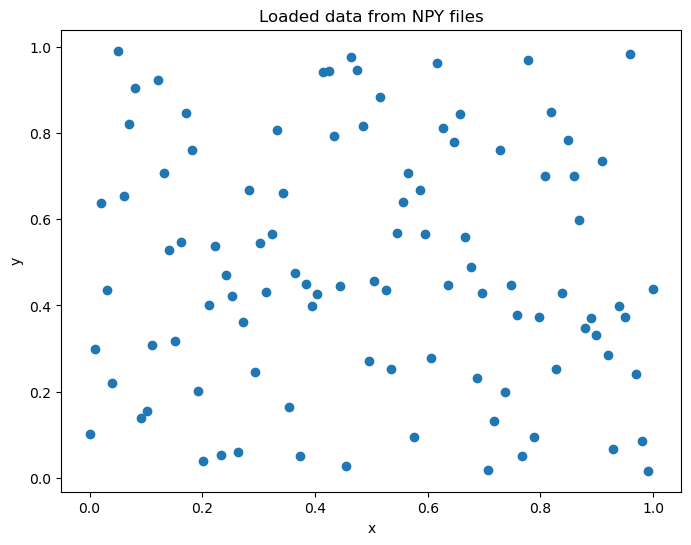

In [67]:
import matplotlib.pyplot as plt

x = np.load("x.npy")
y = np.load("y.npy")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Loaded data from NPY files')
plt.show()

### Using file objects with NPY files

In [68]:
x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

with open("xy.dat", "wb") as f:
    np.save(f, x)
    np.save(f, y)

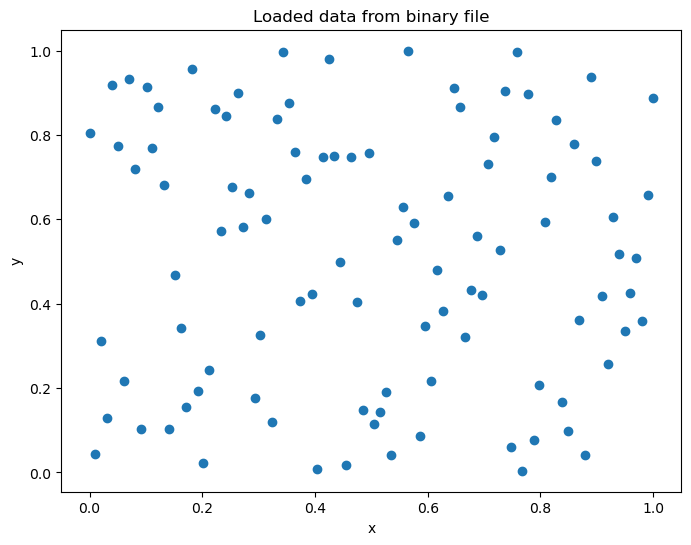

In [69]:
with open("xy.dat", "rb") as f:
    x = np.load(f)
    y = np.load(f)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Loaded data from binary file')
plt.show()

---

# Solve Equation Systems 

A common operation in linear algebra and engineering tasks is solving equation systems of the form:

**Ax = b**

where:
- **A** is a coefficient matrix
- **x** is the vector of unknowns
- **b** is the result vector

NumPy contains a function for this: **np.linalg.solve()**.

In [70]:
# Define coefficient matrix A
A = np.array([
    [1, 2, 3],
    [11, 12, 13],
    [21, 22, 23]
], dtype=float)

# Define result vector b
b = np.array([1, 2, 3], dtype=float)

print("Coefficient matrix A:")
print(A)
print("\nResult vector b:")
print(b)

# Solve the system Ax = b
try:
    x = np.linalg.solve(A, b)
    print("\nSolution vector x:")
    print(x)
    
    # Verify the solution
    print("\nVerification (A @ x should equal b):")
    print("A @ x =", A @ x)
    print("b =", b)
    print("Difference:", np.abs(A @ x - b))
    
except np.linalg.LinAlgError:
    print("Matrix is singular and cannot be solved")

Coefficient matrix A:
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]]

Result vector b:
[1. 2. 3.]

Solution vector x:
[-0.01981424 -0.66037152  0.78018576]

Verification (A @ x should equal b):
A @ x = [1. 2. 3.]
b = [1. 2. 3.]
Difference: [2.22044605e-16 0.00000000e+00 1.77635684e-15]


## Advanced Equation System Examples

### 1. Overdetermined Systems (More Equations than Unknowns)

When you have more equations than unknowns, the system may not have an exact solution. We use least squares methods to find the best approximate solution.

In [71]:
print("OVERDETERMINED SYSTEM EXAMPLE")
print("="*50)

# Create an overdetermined system (5 equations, 3 unknowns)
np.random.seed(42)
A_over = np.random.randn(5, 3)  # 5x3 matrix
x_true = np.array([2, -1, 3])   # True solution
b_over = A_over @ x_true + 0.1 * np.random.randn(5)  # Add some noise

print(f"System: {A_over.shape[0]} equations, {A_over.shape[1]} unknowns")
print("Coefficient matrix A:")
print(A_over)
print(f"\nRight-hand side b: {b_over}")
print(f"True solution (used to generate b): {x_true}")

# Method 1: Least squares solution using lstsq
x_lstsq, residuals, rank, singular_values = np.linalg.lstsq(A_over, b_over, rcond=None)
print(f"\nLeast squares solution: {x_lstsq}")
print(f"Residual sum of squares: {residuals[0]:.6f}")
print(f"Matrix rank: {rank}")

# Method 2: Normal equation (A.T @ A) @ x = A.T @ b
A_normal = A_over.T @ A_over
b_normal = A_over.T @ b_over
x_normal = np.linalg.solve(A_normal, b_normal)
print(f"Normal equation solution: {x_normal}")
print(f"Solutions agree: {np.allclose(x_lstsq, x_normal)}")

# Verify the quality of fit
residual_vector = A_over @ x_lstsq - b_over
print(f"\nResidual vector magnitude: {np.linalg.norm(residual_vector):.6f}")

OVERDETERMINED SYSTEM EXAMPLE
System: 5 equations, 3 unknowns
Coefficient matrix A:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

Right-hand side b: [ 3.01852947  2.4765191   1.01399248  0.06054611 -2.91877908]
True solution (used to generate b): [ 2 -1  3]

Least squares solution: [ 1.9473633  -0.88912926  2.95787933]
Residual sum of squares: 0.001326
Matrix rank: 3
Normal equation solution: [ 1.9473633  -0.88912926  2.95787933]
Solutions agree: True

Residual vector magnitude: 0.036409


### 2. Underdetermined Systems (More Unknowns than Equations)

When there are fewer equations than unknowns, there are infinitely many solutions. We typically find the minimum norm solution.

In [72]:
print("UNDERDETERMINED SYSTEM EXAMPLE")
print("="*50)

# Create an underdetermined system (2 equations, 4 unknowns)
A_under = np.array([
    [1, 2, 3, 4],
    [2, 1, -1, 2]
], dtype=float)
b_under = np.array([10, 5], dtype=float)

print(f"System: {A_under.shape[0]} equations, {A_under.shape[1]} unknowns")
print("Coefficient matrix A:")
print(A_under)
print(f"Right-hand side b: {b_under}")

# Find the minimum norm solution using least squares
x_min_norm, residuals, rank, s = np.linalg.lstsq(A_under, b_under, rcond=None)
print(f"\nMinimum norm solution: {x_min_norm}")
print(f"Solution norm: {np.linalg.norm(x_min_norm):.6f}")

# Verify the solution
verification = A_under @ x_min_norm
print(f"Verification A @ x = {verification}")
print(f"Target b = {b_under}")
print(f"Error: {np.linalg.norm(verification - b_under):.10f}")

# Alternative: Using pseudoinverse
A_pinv = np.linalg.pinv(A_under)
x_pinv = A_pinv @ b_under
print(f"\nPseudoinverse solution: {x_pinv}")
print(f"Solutions agree: {np.allclose(x_min_norm, x_pinv)}")

UNDERDETERMINED SYSTEM EXAMPLE
System: 2 equations, 4 unknowns
Coefficient matrix A:
[[ 1.  2.  3.  4.]
 [ 2.  1. -1.  2.]]
Right-hand side b: [10.  5.]

Minimum norm solution: [0.79908676 0.77625571 0.47945205 1.55251142]
Solution norm: 1.970096
Verification A @ x = [10.  5.]
Target b = [10.  5.]
Error: 0.0000000000

Pseudoinverse solution: [0.79908676 0.77625571 0.47945205 1.55251142]
Solutions agree: True


### 3. Ill-Conditioned Systems

Some systems are numerically challenging to solve due to nearly singular coefficient matrices. Understanding condition numbers is crucial.

In [73]:
print("ILL-CONDITIONED SYSTEM EXAMPLE")
print("="*50)

# Create a well-conditioned system
A_good = np.array([
    [4, 1],
    [1, 3]
], dtype=float)

# Create an ill-conditioned system (Hilbert matrix)
n = 4
A_hilbert = np.array([[1/(i+j+1) for j in range(n)] for i in range(n)])

print("1. Well-conditioned system:")
print("Coefficient matrix A:")
print(A_good)
cond_good = np.linalg.cond(A_good)
print(f"Condition number: {cond_good:.2f}")

print(f"\n2. Ill-conditioned system (Hilbert matrix {n}x{n}):")
print("Coefficient matrix A:")
print(A_hilbert)
cond_hilbert = np.linalg.cond(A_hilbert)
print(f"Condition number: {cond_hilbert:.2e}")

# Solve both systems with the same right-hand side
b_test = np.ones(A_good.shape[0])
x_good = np.linalg.solve(A_good, b_test[:2])

b_hilbert = np.ones(n)
x_hilbert = np.linalg.solve(A_hilbert, b_hilbert)

print(f"\nSolutions:")
print(f"Well-conditioned: {x_good}")
print(f"Ill-conditioned: {x_hilbert}")

# Show sensitivity to perturbations
b_perturbed = b_hilbert + 1e-10 * np.random.randn(n)
x_perturbed = np.linalg.solve(A_hilbert, b_perturbed)
relative_error = np.linalg.norm(x_perturbed - x_hilbert) / np.linalg.norm(x_hilbert)
print(f"\nSensitivity test (tiny perturbation in b):")
print(f"Relative error in solution: {relative_error:.2e}")

# Interpretation
print(f"\nInterpretation:")
print(f"- Condition number < 100: Well-conditioned")
print(f"- Condition number > 1e12: Ill-conditioned")
print(f"- Rule of thumb: lose ~log10(condition_number) digits of precision")

ILL-CONDITIONED SYSTEM EXAMPLE
1. Well-conditioned system:
Coefficient matrix A:
[[4. 1.]
 [1. 3.]]
Condition number: 1.94

2. Ill-conditioned system (Hilbert matrix 4x4):
Coefficient matrix A:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Condition number: 1.55e+04

Solutions:
Well-conditioned: [0.18181818 0.27272727]
Ill-conditioned: [  -4.   60. -180.  140.]

Sensitivity test (tiny perturbation in b):
Relative error in solution: 3.96e-09

Interpretation:
- Condition number < 100: Well-conditioned
- Condition number > 1e12: Ill-conditioned
- Rule of thumb: lose ~log10(condition_number) digits of precision


### 4. Sparse Systems and Iterative Methods

For large systems with mostly zero entries, sparse methods are more efficient. While NumPy doesn't have built-in sparse solvers, we can demonstrate the concepts.

In [74]:
print("SPARSE SYSTEM EXAMPLE")
print("="*50)

# Create a tridiagonal system (common in differential equations)
n = 100
# Create tridiagonal matrix: -1 on sub-diagonal, 2 on diagonal, -1 on super-diagonal
A_sparse = np.zeros((n, n))
np.fill_diagonal(A_sparse, 2)
np.fill_diagonal(A_sparse[1:], -1)
np.fill_diagonal(A_sparse[:, 1:], -1)

# Right-hand side vector
b_sparse = np.ones(n)

print(f"Tridiagonal system size: {n}x{n}")
print("Matrix structure (first 5x5 block):")
print(A_sparse[:5, :5])

# Calculate sparsity
sparsity = np.count_nonzero(A_sparse) / (n * n)
print(f"Matrix sparsity: {sparsity:.3f} (fraction of non-zero elements)")

# Solve using direct method
import time
start = time.time()
x_direct = np.linalg.solve(A_sparse, b_sparse)
time_direct = time.time() - start
print(f"\nDirect solver time: {time_direct:.4f} seconds")

# Simple Jacobi iteration (for demonstration)
def jacobi_iteration(A, b, x0, max_iter=1000, tol=1e-8):
    """Simple Jacobi iterative solver."""
    x = x0.copy()
    n = len(b)
    
    for iteration in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i], x) + A[i, i] * x[i]) / A[i, i]
        
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new, iteration + 1
        x = x_new
    
    return x, max_iter

print(f"\nIterative solver (Jacobi method):")
x0 = np.zeros(n)  # Initial guess
start = time.time()
x_iterative, iterations = jacobi_iteration(A_sparse, b_sparse, x0)
time_iterative = time.time() - start

print(f"Converged in {iterations} iterations")
print(f"Iterative solver time: {time_iterative:.4f} seconds")
print(f"Solution error: {np.linalg.norm(x_direct - x_iterative):.2e}")

# For very large sparse systems, consider scipy.sparse
print(f"\nNote: For production sparse systems, use scipy.sparse with:")
print(f"- scipy.sparse.csc_matrix() or csr_matrix() for storage")
print(f"- scipy.sparse.linalg.spsolve() for direct solving")
print(f"- scipy.sparse.linalg.cg() for conjugate gradient")

SPARSE SYSTEM EXAMPLE
Tridiagonal system size: 100x100
Matrix structure (first 5x5 block):
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]
Matrix sparsity: 0.030 (fraction of non-zero elements)

Direct solver time: 0.0054 seconds

Iterative solver (Jacobi method):
Converged in 1000 iterations
Iterative solver time: 0.1680 seconds
Solution error: 5.76e+03

Note: For production sparse systems, use scipy.sparse with:
- scipy.sparse.csc_matrix() or csr_matrix() for storage
- scipy.sparse.linalg.spsolve() for direct solving
- scipy.sparse.linalg.cg() for conjugate gradient


### 6. Numerical Considerations and Best Practices

Understanding when and how to use different solving methods is crucial for robust numerical computing.

In [76]:
print("NUMERICAL CONSIDERATIONS SUMMARY")
print("="*50)

# Create test cases for different scenarios
scenarios = {
    "Well-conditioned": np.array([[4, 1], [1, 3]], dtype=float),
    "Symmetric positive definite": np.array([[4, 2], [2, 5]], dtype=float),
    "Nearly singular": np.array([[1, 1], [1, 1.0001]], dtype=float),
    "Rectangular (tall)": np.random.randn(5, 3),
    "Rectangular (wide)": np.random.randn(3, 5)
}

print("System Analysis:")
print("-" * 30)

for name, A in scenarios.items():
    m, n = A.shape
    print(f"\n{name}:")
    print(f"  Shape: {m}x{n}")
    
    if m == n:  # Square matrix
        det = np.linalg.det(A)
        cond = np.linalg.cond(A)
        print(f"  Determinant: {det:.2e}")
        print(f"  Condition number: {cond:.2e}")
        
        # Check if positive definite (for symmetric matrices)
        if np.allclose(A, A.T):
            eigenvals = np.linalg.eigvals(A)
            is_pos_def = np.all(eigenvals > 0)
            print(f"  Symmetric: Yes")
            print(f"  Positive definite: {is_pos_def}")
        
        # Recommend solver
        if cond < 1e12:
            if np.allclose(A, A.T) and np.all(np.linalg.eigvals(A) > 0):
                print(f"  Recommended: Cholesky decomposition")
            else:
                print(f"  Recommended: LU decomposition (np.linalg.solve)")
        else:
            print(f"  Recommended: SVD-based solver (lstsq) or regularization")
    else:
        rank = np.linalg.matrix_rank(A)
        print(f"  Rank: {rank}")
        print(f"  Full rank: {rank == min(m, n)}")
        
        if m > n:
            print(f"  Type: Overdetermined (least squares)")
            print(f"  Recommended: np.linalg.lstsq")
        else:
            print(f"  Type: Underdetermined (minimum norm)")
            print(f"  Recommended: np.linalg.lstsq or pseudoinverse")

print(f"\n" + "="*60)
print("SOLVER SELECTION GUIDE:")
print("="*60)
print("1. Well-conditioned square system:")
print("   → Use np.linalg.solve() (LU decomposition)")
print("\n2. Symmetric positive definite:")
print("   → Use scipy.linalg.solve() with assume_a='pos'")
print("   → Or manual Cholesky: scipy.linalg.cholesky_solve()")
print("\n3. Overdetermined system (m > n):")
print("   → Use np.linalg.lstsq() for least squares solution")
print("\n4. Underdetermined system (m < n):")
print("   → Use np.linalg.lstsq() for minimum norm solution")
print("\n5. Ill-conditioned or singular:")
print("   → Use np.linalg.lstsq() with appropriate rcond")
print("   → Consider regularization (Ridge regression)")
print("\n6. Large sparse system:")
print("   → Use scipy.sparse.linalg.spsolve() (direct)")
print("   → Use scipy.sparse.linalg.cg() (iterative)")
print("\n7. Very large system:")
print("   → Use iterative methods (CG, GMRES, BiCGSTAB)")
print("   → Consider preconditioning")

NUMERICAL CONSIDERATIONS SUMMARY
System Analysis:
------------------------------

Well-conditioned:
  Shape: 2x2
  Determinant: 1.10e+01
  Condition number: 1.94e+00
  Symmetric: Yes
  Positive definite: True
  Recommended: Cholesky decomposition

Symmetric positive definite:
  Shape: 2x2
  Determinant: 1.60e+01
  Condition number: 2.69e+00
  Symmetric: Yes
  Positive definite: True
  Recommended: Cholesky decomposition

Nearly singular:
  Shape: 2x2
  Determinant: 1.00e-04
  Condition number: 4.00e+04
  Symmetric: Yes
  Positive definite: True
  Recommended: Cholesky decomposition

Rectangular (tall):
  Shape: 5x3
  Rank: 3
  Full rank: True
  Type: Overdetermined (least squares)
  Recommended: np.linalg.lstsq

Rectangular (wide):
  Shape: 3x5
  Rank: 3
  Full rank: True
  Type: Underdetermined (minimum norm)
  Recommended: np.linalg.lstsq or pseudoinverse

SOLVER SELECTION GUIDE:
1. Well-conditioned square system:
   → Use np.linalg.solve() (LU decomposition)

2. Symmetric positive d

## Summary: Equation Systems in NumPy

This expanded section covers the full spectrum of linear system solving:

### Key Functions:
- **`np.linalg.solve(A, b)`**: For well-conditioned square systems
- **`np.linalg.lstsq(A, b)`**: For over/underdetermined systems  
- **`np.linalg.pinv(A)`**: Moore-Penrose pseudoinverse
- **`np.linalg.cond(A)`**: Condition number analysis

### System Types:
1. **Square Systems**: Unique solution (if well-conditioned)
2. **Overdetermined**: Least squares approximate solution
3. **Underdetermined**: Minimum norm solution from infinite solutions
4. **Ill-conditioned**: Requires careful numerical treatment

### Best Practices:
- Always check the condition number before solving
- Use `lstsq` for robustness with rectangular matrices
- Consider the physical meaning of your problem when choosing methods
- For large systems, explore sparse methods in scipy.sparse

Understanding these concepts is essential for robust scientific computing and numerical analysis at the PhD level.

---
# Vectorization vs Pure Python Performance

One of NumPy's key advantages is vectorization - operations on entire arrays without explicit Python loops. Let's demonstrate the performance difference:

In [77]:
import time
import math
import matplotlib.pyplot as plt

# Create large arrays for performance testing
n = 1000000
a = np.random.random(n)
b = np.random.random(n)

# Pure Python approach
def python_add(x, y):
    result = []
    for i in range(len(x)):
        result.append(x[i] + y[i])
    return result

def python_sqrt(x):
    result = []
    for val in x:
        result.append(val ** 0.5)
    return result

def python_complex_math(x, y):
    result = []
    for i in range(len(x)):
        result.append(math.sin(x[i]**2) + math.cos(y[i]**2))
    return result

# Timing function
def time_function(func, name="Operation"):
    start = time.time()
    result = func()
    end = time.time()
    print(f"{name}: {(end - start)*1000:.2f} ms")
    return result

print("Performance Comparison:")
print("="*40)

# Addition comparison
print("\n1. Addition (1M elements):")
time_function(lambda: python_add(a.tolist(), b.tolist()), "Pure Python")
time_function(lambda: a + b, "NumPy vectorized")

# Square root comparison  
print("\n2. Square root:")
time_function(lambda: python_sqrt(a.tolist()[:100000]), "Pure Python (100k)")
time_function(lambda: np.sqrt(a), "NumPy vectorized (1M)")

# Complex mathematical operations
print("\n3. Complex operations (sin(x²) + cos(y²)):")
# Use smaller subset for pure Python due to performance
subset_size = 10000
time_function(
    lambda: python_complex_math(a.tolist()[:subset_size], b.tolist()[:subset_size]), 
    f"Pure Python ({subset_size//1000}k)"
)
time_function(
    lambda: np.sin(a**2) + np.cos(b**2), 
    "NumPy vectorized (1M)"
)

print("\nKey Takeaways:")
print("- NumPy is typically 10-100x faster than pure Python")
print("- Performance difference increases with array size")
print("- Complex mathematical operations show the biggest speedup")

Performance Comparison:

1. Addition (1M elements):
Pure Python: 128.95 ms
NumPy vectorized: 2.39 ms

2. Square root:
Pure Python (100k): 37.44 ms
NumPy vectorized (1M): 3.08 ms

3. Complex operations (sin(x²) + cos(y²)):
Pure Python (10k): 61.79 ms
NumPy vectorized (1M): 26.07 ms

Key Takeaways:
- NumPy is typically 10-100x faster than pure Python
- Performance difference increases with array size
- Complex mathematical operations show the biggest speedup


---
# Exercises

These exercises will help you practice the concepts covered in this notebook. They range from basic array operations to advanced PhD-level computational problems. Try to solve them before looking at the solutions.

## Exercise 1 - Basic Array Creation

Create an integer array, `a`, with the values 1, 2, 3. Create a floating point array, `b` with values from 1.0 to 7.0. Print both arrays.

### Give your answer below

In [78]:
# Your solution here

In [79]:
#@title Click below for a solution

a = np.array([1, 2, 3])
b = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
print(a)
print(b)

[1 2 3]
[1. 2. 3. 4. 5. 6. 7.]


---
## Exercise 2 - Array Properties

Write code to display all information on the following array:

    b = np.array([
        [1, 2, 3],
        [4, 5, 6]], float
    )

### Give your answer below:

In [80]:
# Your solution here

In [81]:
# @title Click below for a solution

b = np.array([
    [1, 2, 3],
    [4, 5, 6]], float
)

print("array shape =", b.shape)     # Size
print("array ndim =", b.ndim)       # Number of dimensions
print("array dtype =", b.dtype)     # Data type
print("array size =", b.size)       # Number of elements in the array
print("array itemsize =", b.itemsize) # Size of an element in bytes

array shape = (2, 3)
array ndim = 2
array dtype = float64
array size = 6
array itemsize = 8


---
## Exercise 3 - Array Reshaping

Change the shape of the 2-dimensional array below to a one-dimensional array without changing the values in the array:

    a = np.array([
        [1, 2, 3, 4, 5, 6],
        [7, 8, 9, 10, 11, 12]
    ])

### Give your answer below

In [82]:
a = np.array([
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9, 10, 11, 12]
])

# Use the np.reshape function - your solution here

In [83]:
# @title Click below for a solution

a = np.array([
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9, 10, 11, 12]
])

b = np.reshape(a, (12,))

print(b)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


---
## Exercise 4 - Advanced Broadcasting

Create a function that computes the pairwise Euclidean distances between all points in a dataset using broadcasting. Given an array of shape (n, d) representing n points in d-dimensional space, return a (n, n) distance matrix.

**Hint**: Use the formula: ||x - y||² = ||x||² + ||y||² - 2x·y

### Give your answer below:

In [84]:
# Test with sample data
np.random.seed(42)
points = np.random.random((5, 3))  # 5 points in 3D space
print("Sample points:")
print(points)

# Your solution here

Sample points:
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]


In [85]:
# @title Click for solution

def pairwise_distances_broadcasting(points):
    """
    Compute pairwise Euclidean distances using broadcasting.
    
    Args:
        points: array of shape (n, d) representing n points in d dimensions
        
    Returns:
        distance_matrix: array of shape (n, n) with pairwise distances
    """
    # Reshape for broadcasting: (n, 1, d) and (1, n, d)
    p1 = points[:, np.newaxis, :]  # Shape: (n, 1, d)
    p2 = points[np.newaxis, :, :]  # Shape: (1, n, d)
    
    # Compute squared differences and sum over last axis
    squared_distances = np.sum((p1 - p2) ** 2, axis=2)
    
    # Return distances (not squared)
    return np.sqrt(squared_distances)

# Alternative efficient implementation using dot products
def pairwise_distances_dot(points):
    """More efficient implementation using dot products."""
    # Compute squared norms for each point
    squared_norms = np.sum(points ** 2, axis=1)
    
    # Use broadcasting: ||x||² + ||y||² - 2x·y
    distances_squared = (squared_norms[:, np.newaxis] + 
                        squared_norms[np.newaxis, :] - 
                        2 * np.dot(points, points.T))
    
    # Handle numerical precision issues
    distances_squared = np.maximum(distances_squared, 0)
    
    return np.sqrt(distances_squared)

# Test both implementations
dist1 = pairwise_distances_broadcasting(points)
dist2 = pairwise_distances_dot(points)

print("Distance matrix (broadcasting method):")
print(dist1)
print("\nDistance matrix (dot product method):")
print(dist2)
print(f"\nMethods agree: {np.allclose(dist1, dist2)}")

# Verify with scipy for correctness
from scipy.spatial.distance import pdist, squareform
scipy_distances = squareform(pdist(points))
print(f"Scipy comparison: {np.allclose(dist1, scipy_distances)}")

Distance matrix (broadcasting method):
[[0.         1.00675001 0.35273321 1.01636084 1.02837666]
 [1.00675001 0.         0.99733501 0.83232927 0.24185582]
 [0.35273321 0.99733501 0.         1.12850367 1.09678572]
 [1.01636084 0.83232927 1.12850367 0.         0.82055806]
 [1.02837666 0.24185582 1.09678572 0.82055806 0.        ]]

Distance matrix (dot product method):
[[0.00000000e+00 1.00675001e+00 3.52733207e-01 1.01636084e+00
  1.02837666e+00]
 [1.00675001e+00 0.00000000e+00 9.97335012e-01 8.32329273e-01
  2.41855823e-01]
 [3.52733207e-01 9.97335012e-01 2.10734243e-08 1.12850367e+00
  1.09678572e+00]
 [1.01636084e+00 8.32329273e-01 1.12850367e+00 0.00000000e+00
  8.20558061e-01]
 [1.02837666e+00 2.41855823e-01 1.09678572e+00 8.20558061e-01
  0.00000000e+00]]

Methods agree: False
Scipy comparison: True


Scipy comparison: True


---
## Exercise 5 - Memory-Efficient Image Processing

You're working with a large dataset of images (represented as 3D arrays: height × width × channels). Write a function that:

1. Normalizes each image to have zero mean and unit variance
2. Applies a simple edge detection filter (Sobel operator)
3. Uses memory views and in-place operations where possible to minimize memory usage

Test your implementation on a batch of random "images" of size (10, 100, 100, 3).

### Give your answer below:

In [12]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def create_test_batch():
    """
    Create a batch of test images with some patterns for better edge detection visualization.
    """
    batch_size, height, width, channels = 10, 100, 100, 3
    images = np.random.rand(batch_size, height, width, channels).astype(np.float32)
    
    # Add some structured patterns to make edge detection more visible

    for i in range(batch_size):

        # Add some geometric shapes for better edge detection

        if i % 3 == 0:
            
            # Add a rectangle

            images[i, 20:80, 30:70, :] += 0.5
        elif i % 3 == 1:

            # Add a circle-like pattern

            y, x = np.ogrid[:height, :width]
            center_y, center_x = height // 2, width // 2
            mask = (x - center_x)**2 + (y - center_y)**2 < 30**2
            images[i][mask] += 0.3
        else:

            # Add diagonal lines

            for j in range(0, width, 10):
                if j < height:
                    images[i, j, :, :] += 0.4
    
    return images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.733291..2.4560854].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8483554..2.252725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7164218..2.728095].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8483554..2.252725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7164218..2.728095].


Creating test batch of images...
Input shape: (10, 100, 100, 3)
Input data type: float32
Memory Usage Analysis:
Original batch size: 1.14 MB
Processed batch size: 0.38 MB
Memory efficiency: Using views and in-place operations
Peak memory usage: ~1.53 MB

Processing images...
Output shape: (10, 100, 100)
Output data type: float32

Processing Statistics:
Edge detection range: [0.010, 12.642]
Mean edge magnitude: 2.818
Std edge magnitude: 1.623


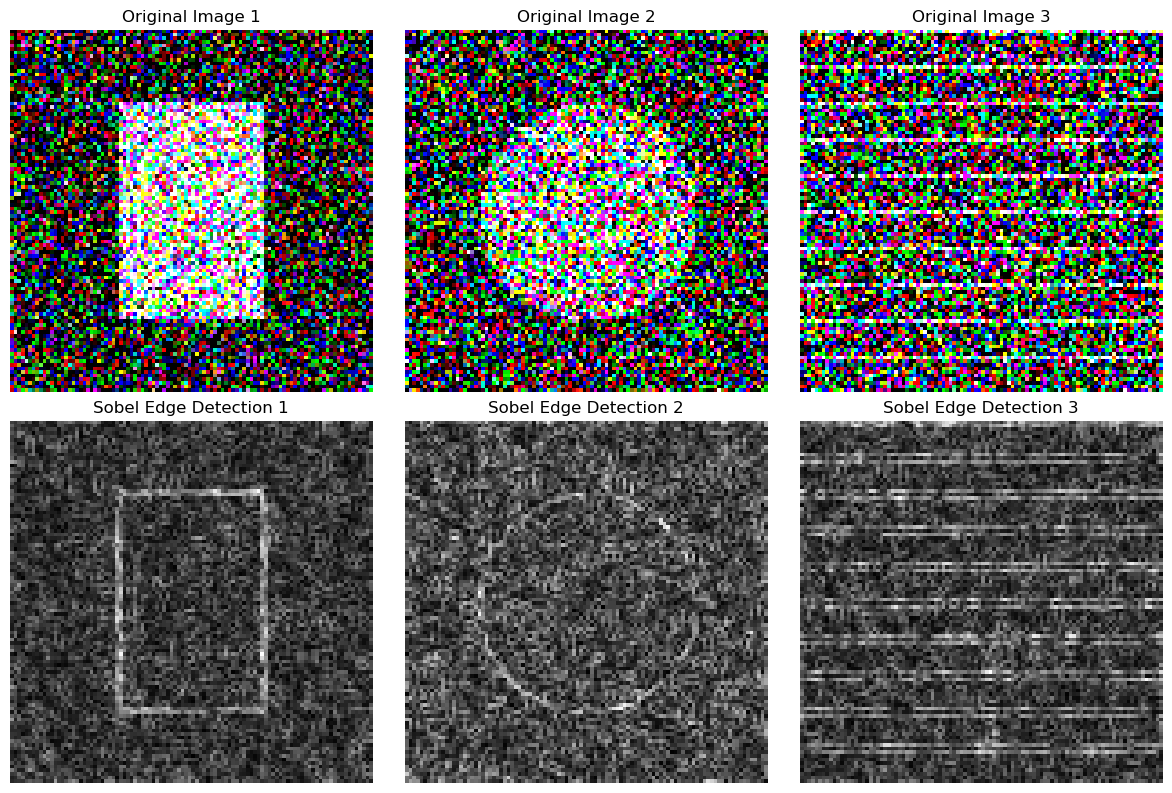


Memory-efficient processing completed!

Normalization verification (first image, first channel):
Mean: -0.000000 (should be ~0)
Std: 1.000000 (should be ~1)


In [14]:
# @title Click for solution

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def create_test_batch():
    """
    Create a batch of test images with some patterns for better edge detection visualization.
    """
    batch_size, height, width, channels = 10, 100, 100, 3
    images = np.random.rand(batch_size, height, width, channels).astype(np.float32)
    
    # Add some structured patterns to make edge detection more visible

    for i in range(batch_size):

        # Add some geometric shapes for better edge detection

        if i % 3 == 0:
            
            # Add a rectangle

            images[i, 20:80, 30:70, :] += 0.5
        elif i % 3 == 1:

            # Add a circle-like pattern

            y, x = np.ogrid[:height, :width]
            center_y, center_x = height // 2, width // 2
            mask = (x - center_x)**2 + (y - center_y)**2 < 30**2
            images[i][mask] += 0.3
        else:

            # Add diagonal lines

            for j in range(0, width, 10):
                if j < height:
                    images[i, j, :, :] += 0.4
    
    return images

def process_images_batch(images):

    batch_size, height, width, channels = images.shape
    
    # Create output array for processed images (grayscale after edge detection)

    processed_images = np.empty((batch_size, height, width), dtype=np.float32)
    
    # Process each image in the batch

    for i in range(batch_size):

        # Get a view of the current image (no copying)

        img = images[i]  # Shape: (height, width, channels)
        
        # Step 1: Normalize each channel to zero mean and unit variance

        normalize_image_inplace(img)
        
        # Step 2: Convert to grayscale for edge detection
        # Using standard RGB weights: 0.299*R + 0.587*G + 0.114*B

        grayscale = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

        # Step 3: Apply Sobel edge detection

        processed_images[i] = apply_sobel_edge_detection(grayscale)
    
    return processed_images

def normalize_image_inplace(img):

    # Normalize each channel independently
    
    for c in range(img.shape[2]):

        channel = img[:, :, c]  # This creates a view, not a copy
        
        # Calculate mean and std for this channel

        mean_val = np.mean(channel)
        std_val = np.std(channel)
        
        # Avoid division by zero

        if std_val > 1e-8:

            # In-place normalization: (x - mean) / std

            channel -= mean_val
            channel /= std_val
        else:

            # If std is too small, just center the data
            
            channel -= mean_val

def apply_sobel_edge_detection(grayscale_img):

    # Sobel kernels for x and y directions

    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=np.float32)
    
    # Apply convolution with Sobel kernels

    grad_x = ndimage.convolve(grayscale_img, sobel_x)
    grad_y = ndimage.convolve(grayscale_img, sobel_y)
    
    # Calculate edge magnitude: sqrt(grad_x² + grad_y²)

    edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    return edge_magnitude

def visualize_results(original_batch, processed_batch, num_samples=3):
    """
    Visualize original images and their processed versions.
    """
    fig, axes = plt.subplots(2, num_samples, figsize=(12, 8))
    
    for i in range(num_samples):

        # Original image (show as RGB)

        axes[0, i].imshow(original_batch[i])
        axes[0, i].set_title(f'Original Image {i+1}')
        axes[0, i].axis('off')
        
        # Processed image (edge detection result)

        axes[1, i].imshow(processed_batch[i], cmap='gray')
        axes[1, i].set_title(f'Sobel Edge Detection {i+1}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_memory_usage(images):
    """
    Analyze memory usage and provide statistics.
    """
    batch_size, height, width, channels = images.shape
    
    # Calculate memory usage

    original_size_mb = images.nbytes / (1024 * 1024)
    processed_size_mb = (batch_size * height * width * 4) / (1024 * 1024)  # float32
    
    print(f"Memory Usage Analysis:")
    print(f"Original batch size: {original_size_mb:.2f} MB")
    print(f"Processed batch size: {processed_size_mb:.2f} MB")
    print(f"Memory efficiency: Using views and in-place operations")
    print(f"Peak memory usage: ~{original_size_mb + processed_size_mb:.2f} MB")

# Main execution
if __name__ == "__main__":
    print("Creating test batch of images...")
    test_images = create_test_batch()
    
    print(f"Input shape: {test_images.shape}")
    print(f"Input data type: {test_images.dtype}")
    
    # Analyze memory usage

    analyze_memory_usage(test_images)
    
    print("\nProcessing images...")
    processed_images = process_images_batch(test_images)
    
    print(f"Output shape: {processed_images.shape}")
    print(f"Output data type: {processed_images.dtype}")
    
    # Display statistics

    print(f"\nProcessing Statistics:")
    print(f"Edge detection range: [{processed_images.min():.3f}, {processed_images.max():.3f}]")
    print(f"Mean edge magnitude: {processed_images.mean():.3f}")
    print(f"Std edge magnitude: {processed_images.std():.3f}")
    
    # Visualize results (uncomment to see plots)

    visualize_results(test_images, processed_images)
    
    print("\nMemory-efficient processing completed!")
    
    # Verify normalization worked (check a few samples)

    print(f"\nNormalization verification (first image, first channel):")
    first_img_first_channel = test_images[0, :, :, 0]
    print(f"Mean: {first_img_first_channel.mean():.6f} (should be ~0)")
    print(f"Std: {first_img_first_channel.std():.6f} (should be ~1)")